# HW1
Name: Lu Guo

## Import data

In [47]:
from google.colab import drive
drive.mount("/drive", force_remount=True)

import json
import pandas as pd

data = []
with open('/drive/My Drive/Colab Notebooks/Wed_Homework1/Amazon_Instant_Video_5.json') as f:
    for line in f:
        data.append(json.loads(line))
          

Mounted at /drive


# Data Extraction Tasks

## 1.Data Extraction

In [48]:
# Extract the desired fields and save to a dataframe
df = pd.DataFrame(data, columns=['reviewText', 'overall', 'summary'])
df.head(2)

,reviewText,overall,summary
0,I had big expectations because I love English ...,2.0,A little bit boring for me
1,I highly recommend this series. It is a must f...,5.0,Excellent Grown Up TV


In [49]:
len(df)

37126

## 2. Save extracted data to a document

In [30]:
df.to_csv("/drive/My Drive/Colab Notebooks/Wed_Homework1/reviews_extracted_data.json") # save extracted texts

# Data Pre-Processing Tasks

## 3. Pre-process reviewText data

### 3.1 Tokenization reviewText

In [51]:
# tokenize the text
# I choose to tokenize because I want to count the frequency of each word
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Tokenize the reviewText and save to reviewText_token
df['reviewText_token'] = df['reviewText'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 3.2 - 3.4 Make tokens lowercase; remove non-words, remove stopwords

In [52]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# I lower cases because I want to count the same words in upper and lower cases together, which provide the same information
df['reviewText_token'] = df['reviewText_token'].apply(lambda x: [item.lower() for item in x]) # use lower case

# I remove non-words because I want to focus on the content words, and I want to remove the punctuations, numbers, and symbols, which are not helpful for my analysis
df['reviewText_token'] = df['reviewText_token'].apply(lambda x: [item for item in x if item.isalpha()])# Only keep word tokens

# I remove the stop words because they are not helpful for my analysis, they are not content words and provide no information
df['reviewText_token'] = df['reviewText_token'].apply(lambda x: [item for item in x if item not in stop_words])# remove stop words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
df["reviewText_token"][0:5]

0    [big, expectations, love, english, tv, particu...
1    [highly, recommend, series, must, anyone, year...
2    [one, real, snoozer, believe, anything, read, ...
3    [mysteries, interesting, tension, robson, tall...
4    [show, always, excellent, far, british, crime,...
Name: reviewText_token, dtype: object

### 3.5 Lemmatization 

In [54]:
# I use lemmatization because I want to count the same words in different inflections together
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
df['reviewText_token'] = df['reviewText_token'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [56]:
df["reviewText_token"][0]

['big',
 'expectation',
 'love',
 'english',
 'tv',
 'particular',
 'investigative',
 'detective',
 'stuff',
 'guy',
 'really',
 'boring',
 'appeal']

In [57]:
# merge the tokens to a list
reviewText_token = []
for i in range(len(df)):
    reviewText_token.extend(df['reviewText_token'][i])


In [58]:
len(reviewText_token) # lengthe of reviewText_token

1683720

In [59]:
reviewText_token[1:3]

['expectation', 'love']

# 4. Pre-process summary data
## 4.1 Tokenize summary data

In [60]:
# Tokenize the summay and save to summray_token
df['summary_token'] = df['summary'].apply(word_tokenize)

### 4.2 - 4.4 Make tokens lowercase; remove non-words, remove stopwords

In [61]:
df['summary_token'] = df['summary_token'].apply(lambda x: [item.lower() for item in x]) # use lower case
df['summary_token'] = df['summary_token'].apply(lambda x: [item for item in x if item.isalpha()])# Only keep word tokens
df['summary_token'] = df['summary_token'].apply(lambda x: [item for item in x if item not in stop_words])# remove stop words

### 4.5 Lemmatization summary

In [62]:
df['summary_token'] = df['summary_token'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])

In [63]:
summary_token = []
for i in range(len(df)):
    summary_token.extend(df['summary_token'][i])

In [64]:
len(summary_token)

104879

In [65]:
summary_token[0:5]

['little', 'bit', 'boring', 'excellent', 'grown']

In [75]:
df.to_csv("/drive/My Drive/Colab Notebooks/Wed_Homework1/reviews_pre-processed_data.json") # save pre-processed texts

## List top 50 words by frequency



In [121]:
# list the top 50 words for reviewText
from nltk import FreqDist
fdist = FreqDist(reviewText_token) 
counter = 0
for word, frequency in fdist.most_common(50):
    print(word+",", end=" ")
    counter += 1
    if counter % 10 == 0:  # print ten words a line
        print("")

show, season, one, like, character, series, episode, good, great, story, 
love, get, really, movie, watch, time, would, see, film, well, 
make, much, first, watching, people, even, way, thing, think, could, 
new, also, know, go, two, interesting, life, better, little, tv, 
many, still, actor, plot, end, best, lot, acting, keep, going, 


In [122]:
# list the top 50 words for summary
from nltk import FreqDist
fdist_summary = FreqDist(summary_token) 
counter = 0
for word, frequency in fdist_summary.most_common(50):
    print(word+",", end=" ")
    counter += 1
    if counter % 10 == 0:  # print ten words a line
        print("")

show, great, good, season, love, series, best, one, fun, like, 
better, movie, interesting, funny, star, tv, excellent, watch, story, awesome, 
really, episode, entertaining, new, time, get, drama, still, well, bad, 
another, character, see, favorite, loved, ever, watching, first, review, much, 
worth, film, keep, little, ok, kid, amazing, ca, five, could, 


## List top 50 bigrams by frequency

In [71]:
# tokenize the bigram of reviewText
from nltk.util import ngrams
reviewText_bigram = ngrams(reviewText_token, 2)
fdist2 = FreqDist(reviewText_bigram)
fdist2.most_common(50)
# print the top 50 bigrams
result = []
counter  = 0
for word, frequency in fdist2.most_common(50):
    print(word[0]+" "+word[1]+",", end = " ")
    result.append(word[0]+" "+word[1]) # merge two words together, so it is much clear
    counter += 1
    if counter % 10 == 0:  # print ten words a line
        print("")

story line, love show, first season, great show, ca wait, first episode, main character, season one, tv show, second season, 
well done, one best, like show, show like, every episode, worth watching, good show, even though, looking forward, well written, 
year old, really like, really good, watch show, highly recommend, next season, look like, show great, amazon prime, feel like, 
season two, character development, bad guy, look forward, tv series, episode season, fun watch, special effect, one favorite, would recommend, 
really enjoyed, watching show, would like, show really, show good, much better, pretty good, season show, wait see, get better, 


In [72]:
# tokenize the bigram of summary
from nltk.util import ngrams
summary_bigram = ngrams(summary_token, 2)
summary_fdist2 = FreqDist(summary_bigram)
summary_fdist2.most_common(50)
# print the top 50 bigrams
counter  = 0
summary_result = []
for word, frequency in summary_fdist2.most_common(50):
    print(word[0]+" "+word[1]+",", end = " ")
    summary_result.append(word[0]+" "+word[1]) # merge two words together, so it is clear
    counter += 1
    if counter % 10 == 0:  # print ten words a line
        print("")

great show, love show, good show, great series, show great, one best, best show, show love, five star, season great, 
great season, show good, good series, love love, series great, tv show, getting better, first season, well done, love series, 
pretty good, season one, fun show, favorite show, show ever, awesome show, worth watching, season good, another great, get better, 
season love, good season, one favorite, show tv, best season, series good, tv series, must see, ca wait, story line, 
second season, good great, keep getting, excellent show, fun watch, good story, good movie, really good, excellent series, love great, 


## List the top 50 bigrams by their mutual information score

In [73]:
# list the top 50 bigrams of reviewText by their mutual information score
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
bigram_measures = nltk.collocations.BigramAssocMeasures() # bigram measurer
finder = BigramCollocationFinder.from_words(reviewText_token) # initialized with the tokens

finder.apply_freq_filter(5) # only bigrams that appear 5+ times
scored = finder.score_ngrams(bigram_measures.pmi) # PMI is a measure of interestingness that allows us to score each bigram.
for bscore in scored[:50]:
    print (bscore)

(('cariba', 'heine'), 18.361292714861253)
(('embeth', 'davidtz'), 18.361292714861253)
(('erland', 'tosterud'), 18.361292714861253)
(('glynn', 'turman'), 18.361292714861253)
(('pomerantz', 'audioworld'), 18.361292714861253)
(('shia', 'labeouf'), 18.361292714861253)
(('donal', 'logue'), 18.09825830902746)
(('horton', 'foote'), 18.09825830902746)
(('karan', 'soni'), 18.09825830902746)
(('leticia', 'dolera'), 18.09825830902746)
(('parminder', 'nagra'), 18.09825830902746)
(('sami', 'gayle'), 18.09825830902746)
(('cch', 'pounder'), 18.098258309027457)
(('elyse', 'levesque'), 18.098258309027457)
(('ginnifer', 'goodwin'), 18.098258309027457)
(('hatfields', 'mccoys'), 18.098258309027457)
(('oded', 'fehr'), 18.098258309027457)
(('oprah', 'winfrey'), 18.098258309027457)
(('viet', 'nam'), 18.098258309027457)
(('zeljko', 'ivanek'), 18.098258309027457)
(('alyson', 'hannigan'), 17.875865887691013)
(('anamaria', 'marinca'), 17.875865887691013)
(('bret', 'easton'), 17.875865887691013)
(('laetitia', 'ca

In [74]:
# list the top 50 bigrams by their mutual information score for summary
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
bigram_measures = nltk.collocations.BigramAssocMeasures() # bigram measurer
finder1 = BigramCollocationFinder.from_words(summary_token) # initialized with the tokens

finder1.apply_freq_filter(5) # only bigrams that appear 5+ times
scored = finder1.score_ngrams(bigram_measures.pmi) # PMI is a measure of interestingness that allows us to score each bigram.
for bscore in scored[:50]:
    print (bscore)

(('jeffrey', 'tambor'), 14.356438214482637)
(('bubble', 'guppy'), 13.871011387312393)
(('clich', 'eacute'), 13.871011387312393)
(('cliff', 'hanger'), 13.871011387312393)
(('natalie', 'zea'), 13.871011387312393)
(('bering', 'sea'), 13.678366309369999)
(('rizzoli', 'isle'), 13.648618965975945)
(('helen', 'mirren'), 13.508441307927686)
(('ho', 'hum'), 13.356438214482637)
(('hart', 'dixie'), 13.245406902093892)
(('battlestar', 'galactica'), 13.218934690732702)
(('rise', 'candleford'), 13.2189346907327)
(('titus', 'welliver'), 13.093403808648844)
(('simon', 'baker'), 13.093403808648842)
(('kevin', 'bacon'), 13.06693159728765)
(('louie', 'ck'), 13.023014480757443)
(('tangled', 'web'), 13.00029440425736)
(('lark', 'rise'), 12.996542269396251)
(('richard', 'gere'), 12.977926591228906)
(('sarah', 'shahi'), 12.977926591228906)
(('sleepy', 'hollow'), 12.977926591228906)
(('tear', 'jerker'), 12.977926591228906)
(('royal', 'pain'), 12.871011387312395)
(('grey', 'anatomy'), 12.871011387312393)
(('mo

## List the top 50 content words in the context of the word “video” or “videos” in the reviewTexts

In [93]:
# filter the reviewTexts if they contain the word "video" or "videos"
df_video = df[df['reviewText'].str.contains("video|videos", case = False)] # include upper cases
len(df_video)

926

In [94]:
df_video.head(2)

,reviewText,overall,summary,reviewText_token,summary_token
46,funny thing. My brother's been trying to get m...,4.0,It's Always Sunny in New Hampshire,"[funny, thing, brother, trying, get, watch, sh...","[always, sunny, new, hampshire]"
69,Love the show. Period. Have just finished watc...,5.0,Best show still in production on Broadcast TV?,"[love, show, period, finished, watching, first...","[best, show, still, production, broadcast, tv]"


In [101]:
# merge tokens with video/videos to a list
reviewText_video_token = []
for list1 in df_video['reviewText_token']:
    reviewText_video_token.extend(list1)

len(reviewText_video_token)

117640

In [103]:
# use POS tagging to filter the content words
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
pos_tagged_words = pos_tag(reviewText_video_token)

# list all the unique POS tags
tags = set([pos for word, pos in pos_tagged_words])
print(tags)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


{'CD', 'WDT', 'WRB', 'RB', 'NNS', 'PRP', 'VB', 'WP', 'RBR', 'VBN', 'JJS', 'JJ', 'UH', 'VBG', 'VBD', 'DT', 'EX', 'WP$', 'VBZ', 'MD', 'IN', 'NN', 'PRP$', 'JJR', 'PDT', 'VBP', 'RBS', 'TO', 'NNP', 'CC', 'FW', 'RP'}


non-content words are: 'CD', 'WDT', 'WRB', 'PRP', 'WP', 'UH', 'DT', 'WP\$', 'MD', 'IN', 'PRP\$', 'TO', 'CC', 'FW', 'RP'.

    
content words are: 'RB', 'NNS', 'VB', 'RBR', 'VBN', 'JJS', 'JJ', 'JJR', 'VBG', 'VBD', 'VBZ', 'NN', 'JJR', 'VBP', 'RBS', 'NNP'.

In [124]:
content_words = [word for word, pos in pos_tagged_words if pos in ['RB', 'NNS', 'VB', 'RBR', 'VBN', 'JJS', 'JJ', 'JJR', 'VBG', 'VBD', 'VBZ', 'NN', 'JJR', 'VBP', 'RBS', 'NNP']]

fdist_video = FreqDist(content_words)
fdist_video.most_common(50)
# print the top 50 words
counter = 0
for word, frequency in fdist_video.most_common(50):
    print(word+",", end = " ")
    counter += 1
    if counter % 25 == 0:  # print ten words a line
        print("")
    

video, show, film, season, episode, series, movie, character, get, time, good, story, really, see, watch, first, make, well, much, also, great, thing, go, even, scene, 
amazon, new, know, people, love, dvd, come, way, look, tv, watching, find, work, many, better, think, feature, life, take, year, end, cast, want, still, going, 


In [107]:
len(content_words)

111258

## List the top 50 content words in the context of the word “video” or “videos” in the reviewTexts for each overall rating

### (1) Overall rating *1.0*

In [128]:
df_video_1 = df_video[df_video['overall'] == 1] # filter the data with rating 1

# merge tokens with video/videos to a list
reviewText_video_token_1 = []
for i in df_video_1['reviewText_token']:
    reviewText_video_token_1.extend(i)
pos_tagged_words_1 = pos_tag(reviewText_video_token_1)
content_works_tag = ['RB','NNS','VB','RBR','VBN','JJS','JJ','JJR','VBG','VBD','VBZ','NN','JJR','VBP','RBS','NNP']
content_words_1 = [word for word, pos in pos_tagged_words_1 if pos in content_works_tag]

fdist_video_1 = FreqDist(content_words_1) 

counter=0
word1 = []
for word, frequency in fdist_video_1.most_common(50):
    word1.append(word)
    print(word+",", end = " ")
    counter += 1
    if counter % 15 == 0:  # print ten words a line
        print("")
    


movie, video, film, get, bad, character, time, people, dvd, even, make, see, watch, season, episode, 
know, really, story, way, amazon, go, camera, horror, money, thing, think, good, look, better, first, 
actor, minute, show, watching, nothing, star, come, anything, want, much, say, space, scene, guy, made, 
find, take, year, acting, new, 

### (2) Overall rating *2.0*

In [130]:
df_video_2 = df_video[df_video['overall'] == 2] # filter the data with rating 2

# merge tokens with video/videos to a list
reviewText_video_token_2 = []
for i in df_video_2['reviewText_token']:
    reviewText_video_token_2.extend(i)
pos_tagged_words_2 = pos_tag(reviewText_video_token_2)
content_words_2 = [word for word, pos in pos_tagged_words_2 if pos in content_works_tag]


fdist_video_2 = FreqDist(content_words_2) 

counter=0
word2 = []
for word, frequency in fdist_video_2.most_common(50):
    word2.append(word)
    print(word+",", end = " ")
    counter += 1
    if counter % 10 == 0:  # print ten words a line
        print("")
    

film, movie, video, story, show, character, much, make, really, good, 
time, get, scene, go, found, thing, way, even, see, footage, 
know, first, vampire, car, watch, also, plot, people, come, feel, 
episode, seems, minute, better, take, something, well, review, made, little, 
look, think, bad, however, new, still, work, horror, find, great, 


### (3) Overall rating *3.0*

In [131]:
df_video_3 = df_video[df_video['overall'] == 3] # filter the data with rating 3

# merge tokens with video/videos to a list
reviewText_video_token_3 = []
for i in df_video_3['reviewText_token']:
    reviewText_video_token_3.extend(i)
pos_tagged_words_3 = pos_tag(reviewText_video_token_3)
content_words_3 = [word for word, pos in pos_tagged_words_3 if pos in content_works_tag]

fdist_video_3 = FreqDist(content_words_3) 

counter=0
word3 = []
for word, frequency in fdist_video_3.most_common(50):
    word3.append(word)
    print(word+",", end = " ")
    counter += 1
    if counter % 10 == 0:  # print ten words a line
        print("")

film, video, movie, show, story, get, time, character, thing, season, 
good, much, episode, see, really, series, go, make, first, even, 
well, people, watch, also, come, going, work, way, think, know, 
dvd, something, guy, scene, watching, director, end, look, better, minute, 
new, still, feature, horror, many, never, back, take, interesting, part, 


### (4) Overall rating *4.0*

In [132]:
df_video_4 = df_video[df_video['overall'] == 4] # filter the data with rating 4

# merge tokens with video/videos to a list
reviewText_video_token_4 = []
for i in df_video_4['reviewText_token']:
    reviewText_video_token_4.extend(i)
pos_tagged_words_4 = pos_tag(reviewText_video_token_4)
content_words_4 = [word for word, pos in pos_tagged_words_4 if pos in content_works_tag]

fdist_video_4 = FreqDist(content_words_4) 

counter=0
word4 = []
for word, frequency in fdist_video_4.most_common(50):
    word4.append(word)
    print(word+",", end = " ")
    counter += 1
    if counter % 10 == 0:  # print ten words a line
        print("")
    

film, show, video, season, episode, movie, get, series, character, time, 
good, first, well, also, much, make, story, scene, see, really, 
thing, great, watch, even, new, find, look, year, way, go, 
know, people, take, come, last, little, still, love, better, cast, 
end, life, bit, made, many, feature, never, work, think, seems, 


### (5) Overall rating *5.0*

In [133]:
df_video_5 = df_video[df_video['overall'] == 5] # filter the data with rating 5

# merge tokens with video/videos to a list
reviewText_video_token_5 = []
for i in df_video_5['reviewText_token']:
    reviewText_video_token_5.extend(i)
pos_tagged_words_5 = pos_tag(reviewText_video_token_5)
content_words_5 = [word for word, pos in pos_tagged_words_5 if pos in content_works_tag]

fdist_video_5 = FreqDist(content_words_5) 

counter=0
word5 = []
for word, frequency in fdist_video_5.most_common(50):
    word5.append(word)
    print(word+",", end = " ")
    counter += 1
    if counter % 10 == 0:  # print ten words a line
        print("")
    

show, video, season, episode, series, character, get, great, watch, amazon, 
time, good, love, well, first, see, really, also, dvd, make, 
instant, film, thing, go, new, tv, scene, even, story, many, 
much, watching, feature, movie, know, cast, work, set, look, life, 
quality, audio, fan, come, people, want, best, commentary, find, lot, 


In [135]:
# Compare the content words in different rating
data_diff = {'rate1':word1,'rate2':word2,'rate3':word3,'rate4':word4,'rate5':word5}
df_diff = pd.DataFrame(data_diff)

print(df_diff)

        rate1      rate2        rate3      rate4       rate5
0       movie       film         film       film        show
1       video      movie        video       show       video
2        film      video        movie      video      season
3         get      story         show     season     episode
4         bad       show        story    episode      series
5   character  character          get      movie   character
6        time       much         time        get         get
7      people       make    character     series       great
8         dvd     really        thing  character       watch
9        even       good       season       time      amazon
10       make       time         good       good        time
11        see        get         much      first        good
12      watch      scene      episode       well        love
13     season         go          see       also        well
14    episode      found       really       much       first
15       know      thing

## Additional analysis: Are there any different words in the two top 50 frequency words for a total score of 1.0 and 5.0?

In [136]:
# compare the two lists, return the top 50 words that are in the list of rating 5 but not in the list of rating 1
for word in word1:
    if word not in word5:
        print(word+",", end=" ")

bad, way, camera, horror, money, think, better, actor, minute, nothing, star, anything, say, space, guy, made, take, year, acting, 

In [137]:
#  return the words that are in the list of rating 5 top 50 words but not in the list of rating 1
for word in word5:
    if word not in word1:
        print(word+",", end=" ")

series, great, love, well, also, instant, tv, many, feature, cast, work, set, life, quality, audio, fan, best, commentary, lot, 

## Draw word cloud for tokens from reviewText and summary.

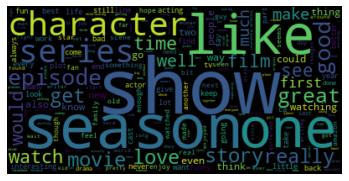

In [139]:
# draw the word cloud for reviewText
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(fdist)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

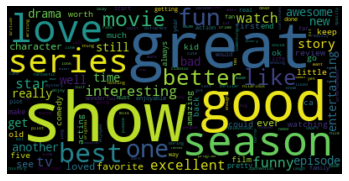

In [138]:
# draw the word cloud for summary
wordcloud1 = WordCloud().generate_from_frequencies(fdist_summary)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()